In [1]:
pip install -Uqq fastbook

Note: you may need to restart the kernel to use updated packages.


In case "Add persistent_workers class variable to FakeLoader " error

please downgrade py torch version by using -> `conda install pytorch==1.6.0 torchvision==0.7.0 -c pytorch` command

* https://github.com/fastai/fastai/pull/2878
* https://github.com/lgvaz/faststyle/pull/18


In [1]:
from sklearn.metrics import classification_report

from fastai.tabular.all import *
from fastai.basics import *
from fastai import *

import numpy as np
import pandas as pd
import glob
# torch.set_num_threads(10)
defaults.device = torch.device('cpu')

In [2]:
# load the baseline model
#learn.load('TubularLearner.fastAI._stage1')
deployed_path = "/mnt/vdb/thesis/TubularLearner.V.retrain"
#deployed_path = "TubularLearner.fastAI._stage2.pth"
learner = load_learner(deployed_path)



In [3]:
learner.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=400, out_features=1383, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(1383, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1383, out_features=1383, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(1383, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1383, out_features=512, bias=False)
      (2): ReLU(inplace=True)
    )
    (3): LinBnDrop(
      (0): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=512, out_fea

In [14]:

df = pd.read_pickle("../datasets/truthset/pssm/AMPs.truthset.reps.pkl")
ready_df =df[[ "reps"]]

In [15]:
def lengthDistribution(df,title):
    fig = plt.figure()
    ax = fig.gca()
    pd.Series(df['length']).hist(color='blue', bins=200, ax=ax)
    plt.ylabel('Num of Seq with this length ')
    plt.xlabel('Length of Seq')
    plt.title(title)

def plotCharDistribution(dict_counts, char_totalsize, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(111)
    # The bar chart, with letters along the horizontal axis and the calculated
    # letter frequencies as percentages as the bar height
    x = range(len(dict_counts))
    letters =  dict_counts.keys()
    ax.bar(x, [val / char_totalsize * 100 for key,val in dict_counts.items()], width=0.8,
        color='g', alpha=0.5, align='center')
    ax.set_xticks(x)
    ax.set_xticklabels(letters)
    ax.tick_params(axis='x', direction='out')
    ax.set_xlim(-0.5, 25.5)
    ax.yaxis.grid(True)
    ax.set_ylabel('Letter frequency, %')

def countProtien(df, title):
    # count Sequence 
    records = df['seq']
    print("Count Records:", len(records))
    # countAminoAcids
    counts = Counter()
    for index, row in df.iterrows():
        line= row['seq']
        counts.update(line.rstrip())
        total = float(sum(counts.values()))
    sorted_dict = {key: value for key, value in sorted(counts.items())}
    for key,val in sorted_dict.items():
        print("{}: {}, ({:.2%})".format(key,val, val / total))

    plotCharDistribution(sorted_dict, total, title)

KeyError: 'length'

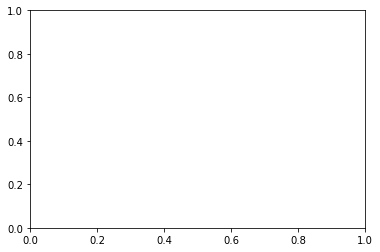

In [16]:
lengthDistribution(df,"Truth")
countProtien(df,"Truth")  # "B|Z|J|U|O"

## Chanage format

In [17]:
df_new = ready_df.reps.apply(pd.Series).astype(np.float64)
df_new.columns = df_new.columns.astype(str)
#to = TabularPandas(df_new , cont_names =reps_columns, y_block = CategoryBlock, splits=splits)

In [18]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.521736,0.497900,0.497900,0.497900,0.497900,0.497900,0.497900,0.497900,0.497900,0.497900,...,0.499300,0.499300,0.499300,0.499300,0.499300,0.499300,0.499300,0.499300,0.499300,0.507249
1,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.497614,0.497614,0.497614,0.497614,0.497614,0.497614,0.497614,0.497614,0.497614,0.524696
2,0.521311,0.497941,0.497941,0.497941,0.497941,0.497941,0.497941,0.497941,0.497941,0.497941,...,0.497941,0.497941,0.497941,0.497941,0.497941,0.497941,0.497941,0.497941,0.497941,0.521311
3,0.508238,0.499205,0.499205,0.499205,0.499205,0.499205,0.499205,0.499205,0.499205,0.499205,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
4,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.496613,0.496613,0.496613,0.496613,0.496613,0.496613,0.496613,0.496613,0.496613,0.535023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.524696,0.497614,0.497614,0.497614,0.497614,0.497614,0.497614,0.497614,0.497614,0.497614,...,0.499205,0.499205,0.499205,0.499205,0.499205,0.499205,0.499205,0.499205,0.499205,0.508238
58,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.499271,0.499271,0.499271,0.499271,0.499271,0.499271,0.499271,0.499271,0.499271,0.507552
59,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
60,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


## Predict Truthset
To get prediction on a new dataframe, you can use the test_d

In [19]:
dl = learner.dls.test_dl(df_new)
_preds,_none ,_y = learner.get_preds(dl=dl, with_decoded=True)

In [20]:
df['class'] = _y
df.drop(columns=['reps'],inplace =True)
df

,ID,paper,seq,class
0,ISGCock_Contig04_0915,PMC4864078,ALQICTRNMIDDRLPYVADNVRPGTFIKQQRKQKQQRHHTSGTRKRMAKG,0
1,ISGCock_Contig13_4610,PMC4864078,HLYPCKLNLKLGKVPFHFLNLNHKGKSIMVNQQTCLYYIICQTR,0
2,ISGCock_Contig16_2060,PMC4864078,ISHNHLTAASITHVKNRGKYIYMHLKFRKTNVLI,0
3,ISGCock_Contig16_4974,PMC4864078,RKKVWFIFHVCPKLKQRILSDTHAKNKCRLSPLLIKSTKIKNET,0
4,ISGCock_Contig07_3736,PMC4864078,CNYISFFRKCKNSQSTMYGCHRMNKCVFSSY,0
...,...,...,...,...
57,TR42258|c1_g1_i1,hal-02965337,MRYIVCFVFFLFFFLLFLWLVPARTASSFLTPRLSSLGKRSWAV,1
58,TR27534|c0_g1_i1,hal-02965337,MLFKVIIVIWISVCRECTRGGFCNFMHLKPISRELRRELYGRTRRRRK,0
59,P3,S2162-2531(20)30132-3,FWELWKFLKSLWSIFPRRRP,0
60,P10,S2162-2531(20)30132-3,ICTTLNWMVKLTCLTHVTLTTRWC,0


In [21]:
df[df["class"] == 1] 

,ID,paper,seq,class
9,ISGCock_Contig15_1337,PMC4864078,KRMKLNAKKLSFCDHLNSYLNLSPTLFIHNSSKQWSHWLWHNGIRI,1
15,Ph10,insects11100676,RISCVAMRLILK,1
19,Ph20,insects11100676,KMFTKCIRYRKM,1
28,Defensin_g8,s41598-020-77982-3,MKAVLLVFLLVVCAVVLAAPLEEHIRRKRFTCDVLGSVSIKDVQLNDAPCALHCLWDGKSGGHCDDSKVCICRD,1
53,Blattellicin_g2,s41598-020-77982-3,MKITAVTFLVLSIAVASSFGRPQATEEEIQKKLKETFKENGFMVLLERIEQRLIGFGAPIFNSTEELFGGRMKERLEKVQESVETAEESEQEQQEQQEQQQQQEQQEQQEQQEHQEQEQQEHQEHQEQPEQEHQEQPEQEHQEQPEQEQQEQQEQEPEPVPAPRLVRSALPEDQSEGIHAGINQQPGVGTVVDVSGRKNVYETDDGRGRVNVEGQWSKVIDGPGRGKPQAGAGINFEYKFRK,1
55,Blattellicin_g4,s41598-020-77982-3,MKITAITFLVMSIAVASSFGRPQTTEEEIQKKLKETFKENGFMVLLEKIEQRLIGFGAPMFDSPEELFGEIKKERLEKVQESVETAEESEQEHQEQQEHQEQQEHQEQQEHQEQPEQEHQEQPEQEHQEQPEHEQQEQQEQQEQQEQQEQHEQEQQEQEPEPVPAPRLVRSARPEDQSEGIHAGINQQPGVGTVVDVSGRKNIYETDDGRGRVNVEGQWSKVIDGPGRGKPQAGAGINFEYKFRK,1
57,TR42258|c1_g1_i1,hal-02965337,MRYIVCFVFFLFFFLLFLWLVPARTASSFLTPRLSSLGKRSWAV,1


Basic Check

check these data exist in training set

# Predict on Shuffled sequences

In [29]:
def predict(_df ,condition):
    #df = _df.loc[_df.length > 30 ].copy() 
    #df = _df.loc[_df.length <= 30 ].copy()
    if condition == 0:
        df = _df.copy()
    elif condition == -1 :
        df = _df.loc[_df.length <= 30 ].copy()
    else:
        df = _df.loc[_df.length > condition ].copy() # select records with lenght > 
    #print(df.columns)
    ready_df = df[[ "reps"]]
    df_new = ready_df.reps.apply(pd.Series).astype(np.float64)
    df_new.columns = df_new.columns.astype(str)
    dl = learner.dls.test_dl(df_new)
    _preds,_none ,_y = learner.get_preds(dl=dl, with_decoded=True)
    df['class'] = _y
    #df.drop(columns=['reps'],inplace =True)
    accuracy = (len(df[df["class"] == 1])/len(df) )*100
    #print("predict AMP :"+str(len(df[df["class"] == 0])))
    #print("predict NonAMP:"+str(len(df[df["class"] == 1])))
    #print("predict NonAMP (in percentage):"+str(accuracy))
    return len(df[df["class"] == 1])

## Retrain with <= 200 AA

In [17]:
deployed_path = "/mnt/vdb/thesis/TubularLearner.III._480.nodropout.retrain"
#deployed_path = "TubularLearner.fastAI._stage2.pth"
learner = load_learner(deployed_path)

In [30]:
result_df = pd.DataFrame( columns=["no_con",">200",">100",">70",">50",">30","30<="],
    index = ['shuff1','shuff2', 'shuff3',"shuff4","shuff5","shuff6","shuff7","shuff8","shuff9","shuff10"])
# shuff1
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_42.reps.plk")
result_df.loc['shuff1', 'no_con']=predict(df_,0)
result_df.loc['shuff1', '>200']= predict(df_,200)
result_df.loc['shuff1', '>100']=predict(df_,100)
result_df.loc['shuff1', '>70']=predict(df_,70)
result_df.loc['shuff1', '>50']=predict(df_,50)
result_df.loc['shuff1', '>30']=predict(df_,30)
result_df.loc['shuff1', '30<=']=predict(df_,-1)
# shuff2
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_43.reps.plk")
result_df.loc['shuff2', 'no_con']=predict(df_,0)
result_df.loc['shuff2', '>200']= predict(df_,200)
result_df.loc['shuff2', '>100']=predict(df_,100)
result_df.loc['shuff2', '>70']=predict(df_,70)
result_df.loc['shuff2', '>50']=predict(df_,50)
result_df.loc['shuff2', '>30']=predict(df_,30)
result_df.loc['shuff2', '30<=']=predict(df_,-1)
# shuff3
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_44.reps.plk")
result_df.loc['shuff3', 'no_con']=predict(df_,0)
result_df.loc['shuff3', '>200']= predict(df_,200)
result_df.loc['shuff3', '>100']=predict(df_,100)
result_df.loc['shuff3', '>70']=predict(df_,70)
result_df.loc['shuff3', '>50']=predict(df_,50)
result_df.loc['shuff3', '>30']=predict(df_,30)
result_df.loc['shuff3', '30<=']=predict(df_,-1)
# shuff4
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_45.reps.plk")
index = "shuff4"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff5
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_46.reps.plk")
index = "shuff5"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff6
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_47.reps.plk")
index = "shuff6"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff7
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_48.reps.plk")
index = "shuff7"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff8
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_49.reps.plk")
index = "shuff8"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff9
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_50.reps.plk")
index = "shuff9"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff10
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_51.reps.plk")
index = "shuff10"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)

result_df

,no_con,>200,>100,>70,>50,>30,30<=
shuff1,22,4,7,13,14,19,3
shuff2,29,4,6,13,24,29,0
shuff3,16,4,6,10,12,16,0
shuff4,13,4,7,8,8,12,1
shuff5,20,4,7,12,12,19,1
shuff6,24,4,7,11,15,21,3
shuff7,14,4,6,9,9,12,2
shuff8,23,4,7,13,15,22,1
shuff9,30,4,6,14,25,30,0
shuff10,16,4,6,11,11,16,0


## Retrain with <= 480 AA TubularLearner.III_1699._480.nodropout.retrain

In [14]:
deployed_path = "/mnt/vdb/thesis/TubularLearner.III_1699._480.nodropout.retrain"
#deployed_path = "TubularLearner.fastAI._stage2.pth"
learner = load_learner(deployed_path)

In [15]:
result_df = pd.DataFrame( columns=["no_con",">200",">100",">70",">50",">30","30<="],
    index = ['shuff1','shuff2', 'shuff3',"shuff4","shuff5","shuff6","shuff7","shuff8","shuff9","shuff10"])
# shuff1
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_42.reps.plk")
result_df.loc['shuff1', 'no_con']=predict(df_,0)
result_df.loc['shuff1', '>200']= predict(df_,200)
result_df.loc['shuff1', '>100']=predict(df_,100)
result_df.loc['shuff1', '>70']=predict(df_,70)
result_df.loc['shuff1', '>50']=predict(df_,50)
result_df.loc['shuff1', '>30']=predict(df_,30)
result_df.loc['shuff1', '30<=']=predict(df_,-1)
# shuff2
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_43.reps.plk")
result_df.loc['shuff2', 'no_con']=predict(df_,0)
result_df.loc['shuff2', '>200']= predict(df_,200)
result_df.loc['shuff2', '>100']=predict(df_,100)
result_df.loc['shuff2', '>70']=predict(df_,70)
result_df.loc['shuff2', '>50']=predict(df_,50)
result_df.loc['shuff2', '>30']=predict(df_,30)
result_df.loc['shuff2', '30<=']=predict(df_,-1)
# shuff3
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_44.reps.plk")
result_df.loc['shuff3', 'no_con']=predict(df_,0)
result_df.loc['shuff3', '>200']= predict(df_,200)
result_df.loc['shuff3', '>100']=predict(df_,100)
result_df.loc['shuff3', '>70']=predict(df_,70)
result_df.loc['shuff3', '>50']=predict(df_,50)
result_df.loc['shuff3', '>30']=predict(df_,30)
result_df.loc['shuff3', '30<=']=predict(df_,-1)
# shuff4
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_45.reps.plk")
index = "shuff4"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff5
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_46.reps.plk")
index = "shuff5"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff6
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_47.reps.plk")
index = "shuff6"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff7
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_48.reps.plk")
index = "shuff7"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff8
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_49.reps.plk")
index = "shuff8"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff9
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_50.reps.plk")
index = "shuff9"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff10
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_51.reps.plk")
index = "shuff10"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)


In [16]:
result_df

,no_con,>200,>100,>70,>50,>30,30<=
shuff1,21,1,4,10,11,18,3
shuff2,28,1,4,10,21,26,2
shuff3,15,0,2,8,10,14,1
shuff4,14,0,3,5,6,13,1
shuff5,17,0,3,8,8,15,2
shuff6,19,1,4,8,9,16,3
shuff7,12,0,3,6,6,9,3
shuff8,13,1,4,8,8,12,1
shuff9,18,1,3,9,14,18,0
shuff10,11,0,3,7,7,11,0


## Retrain .III.

In [12]:
deployed_path = "/mnt/vdb/thesis/TubularLearner.III.dev._200.nodropout.retrain"
#deployed_path = "TubularLearner.fastAI._stage2.pth"
learner = load_learner(deployed_path)

result_df = pd.DataFrame( columns=["no_con",">200",">100",">70",">50",">30","30<="],
    index = ['shuff1','shuff2', 'shuff3',"shuff4","shuff5","shuff6","shuff7","shuff8","shuff9","shuff10"])
# shuff1
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_42.reps.plk")
result_df.loc['shuff1', 'no_con']=predict(df_,0)
result_df.loc['shuff1', '>200']= predict(df_,200)
result_df.loc['shuff1', '>100']=predict(df_,100)
result_df.loc['shuff1', '>70']=predict(df_,70)
result_df.loc['shuff1', '>50']=predict(df_,50)
result_df.loc['shuff1', '>30']=predict(df_,30)
result_df.loc['shuff1', '30<=']=predict(df_,-1)
# shuff2
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_43.reps.plk")
result_df.loc['shuff2', 'no_con']=predict(df_,0)
result_df.loc['shuff2', '>200']= predict(df_,200)
result_df.loc['shuff2', '>100']=predict(df_,100)
result_df.loc['shuff2', '>70']=predict(df_,70)
result_df.loc['shuff2', '>50']=predict(df_,50)
result_df.loc['shuff2', '>30']=predict(df_,30)
result_df.loc['shuff2', '30<=']=predict(df_,-1)
# shuff3
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_44.reps.plk")
result_df.loc['shuff3', 'no_con']=predict(df_,0)
result_df.loc['shuff3', '>200']= predict(df_,200)
result_df.loc['shuff3', '>100']=predict(df_,100)
result_df.loc['shuff3', '>70']=predict(df_,70)
result_df.loc['shuff3', '>50']=predict(df_,50)
result_df.loc['shuff3', '>30']=predict(df_,30)
result_df.loc['shuff3', '30<=']=predict(df_,-1)
# shuff4
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_45.reps.plk")
index = "shuff4"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff5
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_46.reps.plk")
index = "shuff5"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff6
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_47.reps.plk")
index = "shuff6"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff7
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_48.reps.plk")
index = "shuff7"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff8
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_49.reps.plk")
index = "shuff8"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff9
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_50.reps.plk")
index = "shuff9"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff10
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_51.reps.plk")
index = "shuff10"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)


In [13]:
result_df

,no_con,>200,>100,>70,>50,>30,30<=
shuff1,23,4,7,14,15,20,3
shuff2,27,4,6,12,23,27,0
shuff3,21,4,6,12,14,20,1
shuff4,15,4,6,9,9,14,1
shuff5,16,4,6,11,11,15,1
shuff6,23,4,7,12,14,21,2
shuff7,12,4,5,7,7,9,3
shuff8,22,4,7,13,15,21,1
shuff9,26,4,5,13,21,26,0
shuff10,14,4,6,10,10,13,1
